In [69]:
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
file_path_FinancialIdicatior = "/kaggle/input/b-and-d-understanding/Simplize_FPT_FinancialIndicator_20250315.xlsx"
file_path_PriceHistory = "/kaggle/input/scxc2323/FPT_PriceHistory_after_fill.xlsx"

In [71]:
# Đọc dữ liệu (Read data)
data_FinancialIdicatior = pd.read_excel(file_path_FinancialIdicatior)
data_PriceHistory = pd.read_excel(file_path_PriceHistory)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [72]:
# Xóa những cột không liên quan (Remove irrelevant columns)
threshold = data_FinancialIdicatior.shape[1]*0.7
data_FinancialIdicatior_cleaned = data_FinancialIdicatior.dropna(thresh = threshold)
data_FinancialIdicatior_cleaned = data_FinancialIdicatior_cleaned.reset_index(drop = True)

In [73]:
import numpy as np
all_data = []
for i in range(1, 55):  
    row = data_FinancialIdicatior_cleaned.iloc[i, 1:]  # Lấy dữ liệu số từ cột 2 trở đi
    # Tính Five-Number Summary và độ lệch chuẩn, phương sai
    five_number_summary = row.quantile([0, 0.25, 0.5, 0.75, 1])
    std_dev = np.std(data_FinancialIdicatior_cleaned.iloc[i, 1:], ddof=1) 
    variance = np.var(data_FinancialIdicatior_cleaned.iloc[i, 1:], ddof=1)
    # Gộp kết quả
    all_data.append({
        "Name" : data_FinancialIdicatior_cleaned.iloc[i, 0],
        "Min": f"{float(five_number_summary[0.00]):.2f}",  
        "Q1" : f"{float(five_number_summary[0.25]):.2f}",
        "Median" : f"{float(five_number_summary[0.50]):.2f}",
        "Q3" : f"{float(five_number_summary[0.75]):.2f}",
        "Max" : f"{float(five_number_summary[1.00]):.2f}",
        "StdDev": f"{std_dev:.2f}",  
        "Variance": f"{variance:.2f}"  
    })
df = pd.DataFrame(all_data, columns=["Name", "Min", "Q1", "Median", "Q3", "Max","StdDev","Variance"])
df.to_excel("descriptive_statistics_FinancialIdicatior.xlsx", index=False)


In [74]:
all_data = []
for i in range(1, 8):  
    row = data_PriceHistory_cleaned.iloc[1:, i]  # Lấy dữ liệu số từ đòng 2 trở đi
    # Tính Five-Number Summary và độ lệch chuẩn, phương sai
    five_number_summary = row.quantile([0, 0.25, 0.5, 0.75, 1])
    std_dev = np.std(data_FinancialIdicatior_cleaned.iloc[i, 1:], ddof=1) 
    variance = np.var(data_FinancialIdicatior_cleaned.iloc[i, 1:], ddof=1)
    #Gộp kết quả
    all_data.append({
        "Name" : data_FinancialIdicatior_cleaned.iloc[i, 0],
        "Min": f"{float(five_number_summary[0.00]):.2f}",  
        "Q1" : f"{float(five_number_summary[0.25]):.2f}",
        "Median" : f"{float(five_number_summary[0.50]):.2f}",
        "Q3" : f"{float(five_number_summary[0.75]):.2f}",
        "Max" : f"{float(five_number_summary[1.00]):.2f}",
        "StdDev": f"{std_dev:.2f}",  
        "Variance": f"{variance:.2f}"  
    })
df = pd.DataFrame(all_data, columns=["Name", "Min", "Q1", "Median", "Q3", "Max","StdDev","Variance"])
df.to_excel("descriptive_statistics_PriceHistory.xlsx", index=False)


In [75]:
# Lấy dòng 1 (chỉ số 1) làm tên cột
data_FinancialIdicatior_cleaned.columns = data_FinancialIdicatior_cleaned.iloc[0]

# Xóa dòng 1 vì nó đã được dùng làm tên cột
data_FinancialIdicatior_cleaned = data_FinancialIdicatior_cleaned.drop(0).reset_index(drop=True)

In [76]:
data_PriceHistory_cleaned['NGÀY']= pd.to_datetime(data_PriceHistory_cleaned['NGÀY'], dayfirst=True)
df = data_PriceHistory_cleaned[['NGÀY','GIÁ ĐÓNG CỬA']]

Text(0, 0.5, 'Tần suất')

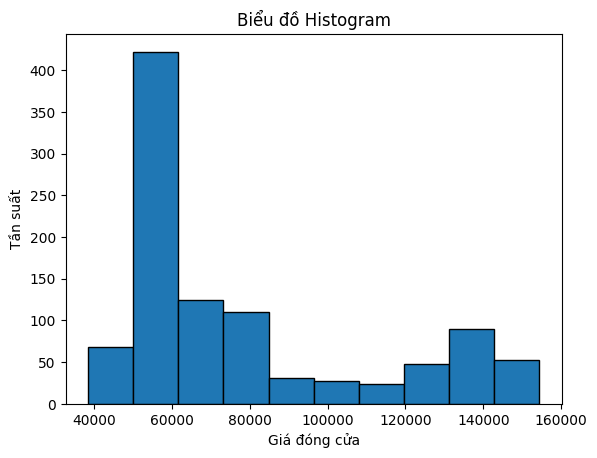

In [77]:
plt.hist(df['GIÁ ĐÓNG CỬA'], bins = 10, edgecolor='black')
plt.title('Biểu đồ Histogram')
plt.xlabel('Giá đóng cửa')
plt.ylabel('Tần suất')

Nhận xét: Vì biểu đồ histogram có đuôi kéo dài về bên phải nên dữ liệu lệch phải. Dữ liệu tập trung nhiều nhất trong khoảng 50000 đến 60000, với tần suất lớn hơn 400.

Text(0, 0.5, 'Giá đóng cửa')

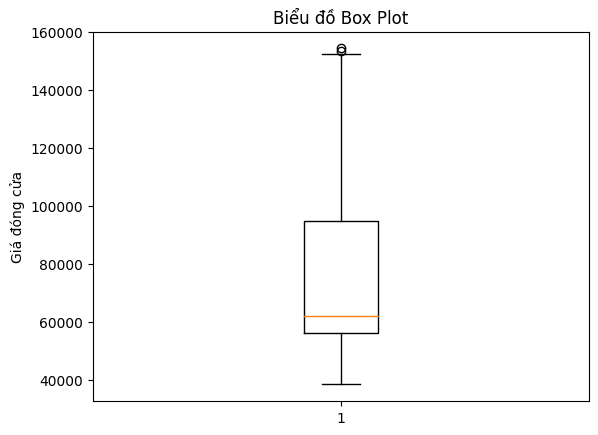

In [78]:
plt.boxplot(df['GIÁ ĐÓNG CỬA'])
plt.title('Biểu đồ Box Plot')
plt.ylabel('Giá đóng cửa')

Nhận xét: 
- Giá trị nhỏ nhất của dữ liệu khoảng 40000, giá trị trung vị khoảng 60000, trong khi đó giá trị lớn nhất bằng 155000, cho thấy rằng phạm vi biến động của giá trị cổ phiếu khá lớn.
- Không có giá trị ngoại lai trên biểu đồ.